In [72]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [73]:
# Basic Variables
minimum = -1
maximum = 1
n = 250
variability = .25
seed_id = 42
degree = 3
degrees = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Set the np seed
np.random.seed(seed_id)

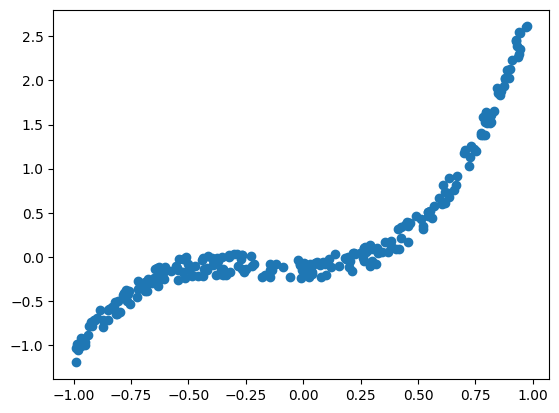

In [74]:
# Generate random non-uniform data
X = np.random.uniform(minimum, maximum, n)

# Generate Y values, which will contain random noise.
Y = 2*X**3 + X**2 + np.random.uniform(-(variability) * maximum, 0.05 * variability, n)

# Create a dictionary to store the data.
data = pd.DataFrame({'X': X, 'Y': Y})

# Graph resulting values.
plt.scatter(data['X'], data['Y'])

Linear Regression MSE: 0.16416044289276369
Ridge MSE: 0.16484171983946566
Lasso MSE: 0.7294141718345983
Polynomial Regression MSE: 0.006669697410395483


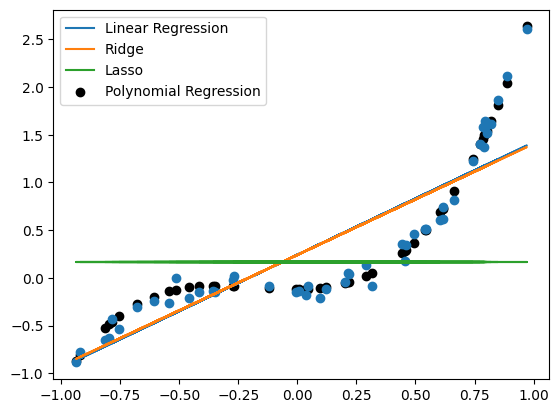

In [75]:
# Do a train-test split
X_train, X_test, Y_train, Y_test = train_test_split(data['X'], data['Y'], test_size=0.2)

# Train the following models:
# - Linear Regression
# - Ridge Regression
# - Lasso Regression
# - Polynomial Features
models = [LinearRegression(), Ridge(), Lasso()]
model_names = ['Linear Regression', 'Ridge', 'Lasso']

# Train the models
for model, name in zip(models, model_names):
    model.fit(X_train.values.reshape(-1, 1), Y_train)
    Y_pred = model.predict(X_test.values.reshape(-1, 1))
    mse = mean_squared_error(Y_test, Y_pred)
    print(f'{name} MSE: {mse}')

    # Plot the model
    plt.plot(X_test, Y_pred, label=name)

# Now do the poly
poly = make_pipeline(PolynomialFeatures(degree), LinearRegression())
poly.fit(X_train.values.reshape(-1, 1), Y_train)
Y_pred = poly.predict(X_test.values.reshape(-1, 1))
mse = mean_squared_error(Y_test, Y_pred)
print(f'Polynomial Regression MSE: {mse}')

# Plot the polynomial regression, as points, not a line...
plt.scatter(X_test, Y_pred, label='Polynomial Regression', color='black')

# Plot the data points as well.
plt.scatter(X_test, Y_test)
plt.legend()
plt.show()

Degree 1 MSE: 0.1772683833189051
Degree 2 MSE: 0.10158096013474487
Degree 3 MSE: 0.006295444959728939
Degree 4 MSE: 0.006375894648666928
Degree 5 MSE: 0.006323402949985286
Degree 6 MSE: 0.006337468109607639
Degree 7 MSE: 0.006524159107761679
Degree 8 MSE: 0.006491996175663384
Degree 9 MSE: 0.006457695310666518
Degree 10 MSE: 0.006516671671900037


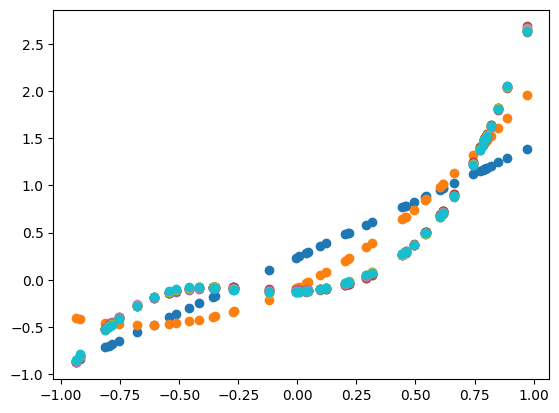

In [76]:
# Now we want to test the polynomial regression with different degrees.
for degree in degrees:
    poly = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    scores = cross_val_score(poly, X_train.values.reshape(-1, 1), Y_train, cv=5, scoring='neg_mean_squared_error')
    print(f'Degree {degree} MSE: {np.mean(-scores)}')
    
    # Plot the polynomial regression, as points, not a line...
    poly.fit(X_train.values.reshape(-1, 1), Y_train)
    Y_pred = poly.predict(X_test.values.reshape(-1, 1))
    
    # Plot the polynomial regression, as points, not a line...
    plt.scatter(X_test, Y_pred, label=f'Degree {degree}')